## Random forest cheat sheet

<b style="color:red">Note: I am not investigating if random forest is proper algorithm for the dataset I am using, I'm just implementing random forest and experiment with it<b>

In [76]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

### Data

Regression prediction of diabetes progression measurement based on age, sex, body mass index, average blood pressure, and six blood serum measurements, obtained for 442 diabetes patients. 

In [29]:
data = load_diabetes()
X = pd.DataFrame(data=data["data"],columns = data["feature_names"])
y = data["target"]

In [30]:
X.shape

(442, 10)

In [31]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Target varibale is value between 25 and 346 and it indicates measurement of diabeters progression, less is slower progression and bigger value is more rapid progression

In [32]:
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [33]:
print("Target value max:",y.max())
print("Target value min:",y.min())
print("Target value mean:",y.mean())

Target value max: 346.0
Target value min: 25.0
Target value mean: 152.13348416289594


### Random forest for regression

In [34]:
forest = RandomForestRegressor(random_state=1)

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [36]:
forest.fit(train_X,train_y)

RandomForestRegressor(random_state=1)

In [37]:
prediction = forest.predict(test_X)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE:",mean_squared_error(prediction,test_y))
print("MAE:",mean_absolute_error(prediction,test_y))

MSE: 3807.65397927928
MAE: 50.82423423423424


#### Improving the model

Model's performance with default parameter gave us MSE of about 3807 and MAE of about 50, let's tune the hyperparameters and look for improvements

In [39]:
forest2 = RandomForestRegressor(random_state=1,n_estimators=50)
forest3 = RandomForestRegressor(random_state=1,criterion="absolute_error")
forest4 = RandomForestRegressor(random_state=1,max_depth=6)

In [40]:
forest2.fit(train_X,train_y)
forest3.fit(train_X,train_y)
forest4.fit(train_X,train_y)

RandomForestRegressor(max_depth=6, random_state=1)

In [42]:
prediction2 = forest2.predict(test_X)
prediction3 = forest3.predict(test_X)
prediction4 = forest4.predict(test_X)

In [43]:
print("prediction 2 MSE:",mean_squared_error(prediction2,test_y))
print("prediction 2 MAE:",mean_absolute_error(prediction2,test_y))

prediction 2 MSE: 3936.059481081081
prediction 2 MAE: 51.28756756756758


In [44]:
print("prediction 3 MSE:",mean_squared_error(prediction3,test_y))
print("prediction 3 MAE:",mean_absolute_error(prediction3,test_y))

prediction 3 MSE: 3995.6178126126133
prediction 3 MAE: 51.817837837837835


In [46]:
print("prediction 4 MSE:",mean_squared_error(prediction4,test_y))
print("prediction 4 MAE:",mean_absolute_error(prediction4,test_y))

prediction 4 MSE: 3820.7067178314323
prediction 4 MAE: 50.71741008267791


In [70]:
best_found = mean_absolute_error(prediction4,test_y)

#### We can't see much improvement

Let's speed up tuning hyperparameters process and model validation by using <b> GridSearchCV</b>

In [60]:
hyperparams = dict(n_estimators=range(1,201,50),criterion=["squared_error","absolute_error"],
                  max_depth=range(1,10,2),min_samples_split=range(2,11,4),min_samples_leaf=range(1,11,4),
                   max_features=[0.25,0.5,0.75,1.0],random_state=[1],n_jobs=[-1])
grid = GridSearchCV(RandomForestRegressor(),param_grid=hyperparams,scoring=["neg_mean_squared_error","neg_mean_absolute_error"],
                   n_jobs=-1,refit="neg_mean_absolute_error")

In [61]:
grid.fit(X,y)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(1, 10, 2),
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'min_samples_leaf': range(1, 11, 4),
                         'min_samples_split': range(2, 11, 4),
                         'n_estimators': range(1, 201, 50), 'n_jobs': [-1],
                         'random_state': [1]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'])

<b>After running GridSearchCV on a random forest model with a large number of hyperparameters to test, I realized that it was extremely computationally demanding and time-consuming. This is because random forest models are inherently more complex than standard decision trees. Even if I had only used 5 folds for cross validation,the entire process remained highly demanding. As a solution, I decided to use random search later to explore if I could find a set of hyperparameters that yielded comparable results to those obtained from the grid search. Overall, using grid search for random forest models may to demanding</b>

But first let's check what grid search found

In [63]:
grid.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=9, n_estimators=151, n_jobs=-1,
                      random_state=1)

In [72]:
best_grid_found = -grid.best_score_
best_grid_found

45.147646266970625

In [80]:
print(f"MAE score was improved by {((best_found-best_grid_found)/best_found)*100}%")

MAE score was improved by 10.981956307760257%


In [86]:
param_data = pd.DataFrame(grid.cv_results_)
param_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,0.010572,0.000799,0.002195,0.000399,squared_error,1,0.25,1,2,1,...,535.419855,1296,-57.005540,-60.072773,-65.752742,-55.866331,-61.848035,-60.109084,3.535791,1361
1,0.068018,0.002632,0.014960,0.001784,squared_error,1,0.25,1,2,51,...,311.932171,1117,-53.096020,-55.130723,-58.649239,-53.793342,-59.769734,-56.087812,2.655142,1258
2,0.135543,0.006511,0.018974,0.002092,squared_error,1,0.25,1,2,101,...,305.660970,1087,-52.557985,-54.265850,-57.991322,-53.522407,-59.262727,-55.520058,2.624966,1231
3,0.274917,0.053221,0.038109,0.013408,squared_error,1,0.25,1,2,151,...,308.853190,1102,-52.693902,-54.520943,-57.977529,-53.719306,-59.292336,-55.640803,2.546545,1240
4,0.019901,0.005260,0.003801,0.001727,squared_error,1,0.25,1,6,1,...,535.419855,1296,-57.005540,-60.072773,-65.752742,-55.866331,-61.848035,-60.109084,3.535791,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.791423,0.083607,0.116493,0.076707,absolute_error,9,1.0,9,6,151,...,204.600922,91,-43.561984,-43.947169,-46.187651,-46.255908,-45.785521,-45.147646,1.155180,1
1436,0.028125,0.002129,0.002194,0.000747,absolute_error,9,1.0,9,10,1,...,501.935453,1150,-56.904494,-53.393258,-49.607955,-53.613636,-47.380682,-52.180005,3.331577,1042
1437,0.351875,0.126665,0.113500,0.048155,absolute_error,9,1.0,9,10,51,...,221.252106,120,-43.801278,-43.821436,-46.704880,-46.762701,-45.077429,-45.233545,1.309424,10
1438,0.612989,0.060602,0.186808,0.131991,absolute_error,9,1.0,9,10,101,...,194.265352,220,-43.852375,-44.094115,-46.402228,-46.229017,-45.645477,-45.244642,1.070681,16


#### Let's analyse influance of some features on mean absolute error

In [105]:
mae_max_depth = -param_data.groupby("param_max_depth")["mean_test_neg_mean_absolute_error"].mean()
mae_trees_in_forest = -param_data.groupby("param_n_estimators")["mean_test_neg_mean_absolute_error"].mean()
mae_max_features = param_data.groupby("param_max_features")["mean_test_neg_mean_absolute_error"].groups

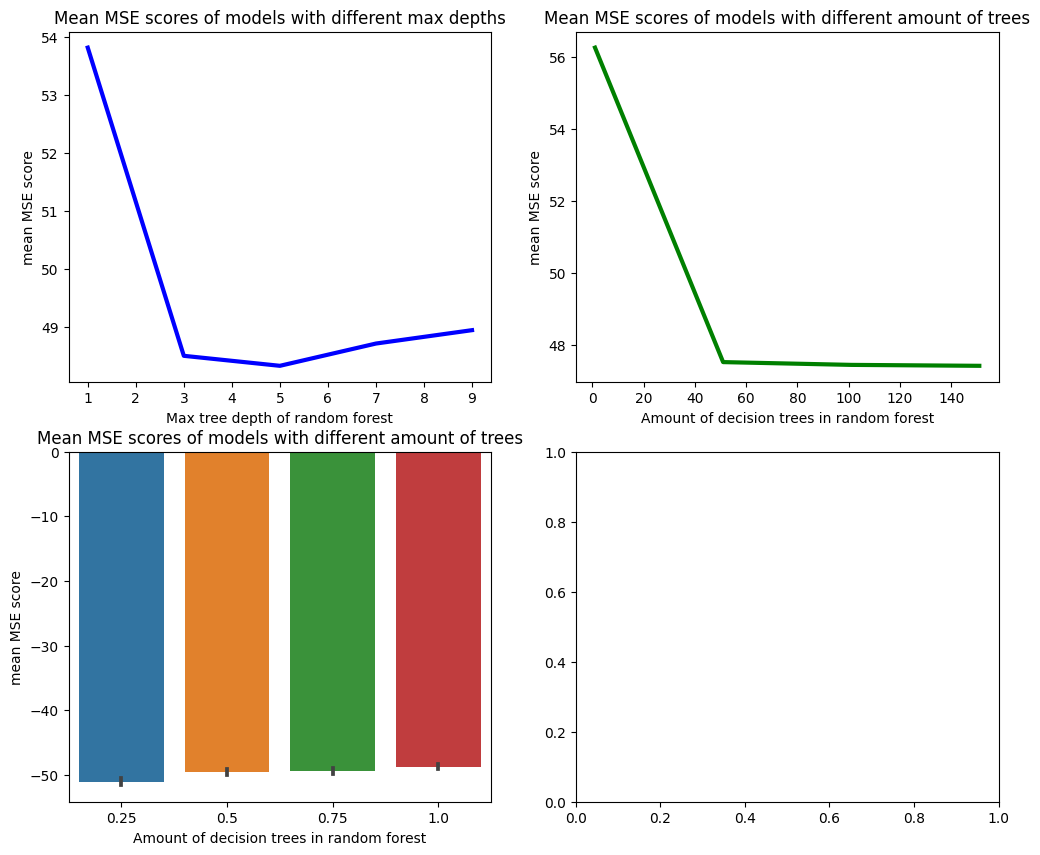

In [121]:
fig, ax = plt.subplots(2,2,figsize=(12,10))

sns.lineplot(mae_max_depth,ax=ax[0,0],linewidth=3,color="b")
ax[0,0].set_xlabel("Max tree depth of random forest")
ax[0,0].set_ylabel("mean MSE score")
ax[0,0].title.set_text("Mean MSE scores of models with different max depths")

sns.lineplot(mae_trees_in_forest,ax=ax[0,1],linewidth=3,color="g")
ax[0,1].set_xlabel("Amount of decision trees in random forest")
ax[0,1].set_ylabel("mean MSE score")
ax[0,1].title.set_text("Mean MSE scores of models with different amount of trees")

sns.barplot(data=param_data,y="mean_test_neg_mean_absolute_error",x="param_max_features",ax=ax[1,0])
ax[1,0].set_xlabel("Amount of decision trees in random forest")
ax[1,0].set_ylabel("mean MSE score")
ax[1,0].title.set_text("Mean MSE scores of models with different amount of trees")




plt.show()